In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
wh <- read_csv("geoWaffles.csv")

Parsed with column specification:
cols(
  full = col_character(),
  lats = col_double(),
  lngs = col_double()
)


In [36]:
heart <- read_csv("heart_disease.csv")

Parsed with column specification:
cols(
  Year = col_integer(),
  LocationAbbr = col_character(),
  LocationDesc = col_character(),
  GeographicLevel = col_character(),
  DataSource = col_character(),
  Class = col_character(),
  Topic = col_character(),
  Data_Value = col_double(),
  Data_Value_Unit = col_character(),
  Data_Value_Type = col_character(),
  Data_Value_Footnote_Symbol = col_character(),
  Data_Value_Footnote = col_character(),
  StratificationCategory1 = col_character(),
  Stratification1 = col_character(),
  StratificationCategory2 = col_character(),
  Stratification2 = col_character(),
  TopicID = col_character(),
  LocationID = col_character(),
  `Location 1` = col_character()
)


Warning message:
“Removed 25502 rows containing non-finite values (stat_summary_hex).”

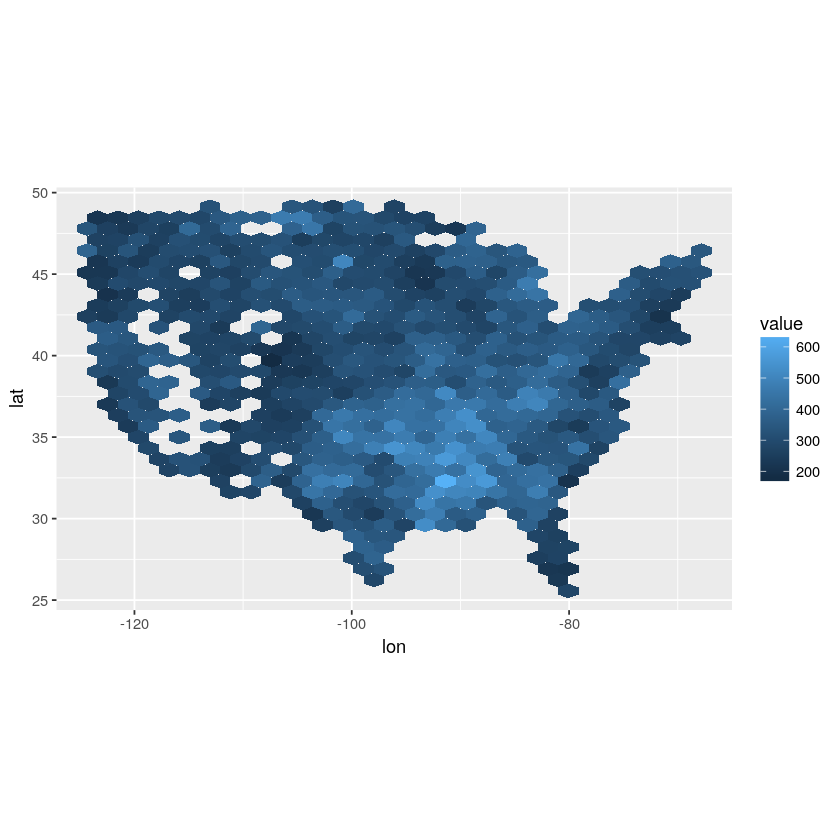

In [63]:
lat_lon = str_match(heart$`Location 1`, "\\((-?\\d+\\.\\d+), (-?\\d+\\.\\d+)\\)")
heart <- mutate(heart, lat=as.numeric(lat_lon[, 2]), lon=as.numeric(lat_lon[, 3])) %>% filter(lat > 20, lon > -125)
ggplot(data=heart, aes(x=lon, y=lat)) + stat_summary_hex(aes(z=Data_Value)) + coord_fixed(ratio=1.5)
    # geom_point(data=wh, aes(x=lngs, y=lats), alpha=.1, color="green") + 